In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_excel('Iris.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
iris           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
petalwidth = data[['petalwidth']]
petallength = data['petallength']

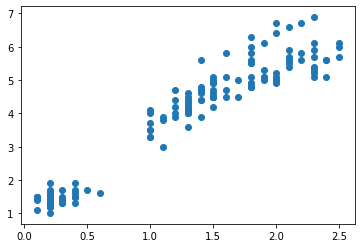

In [5]:
plt.scatter(petalwidth,petallength)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(petalwidth,
                                                    petallength, 
                                                    test_size=0.2,
                                                   random_state=42)

In [7]:
# neu nhu co mot so k co score = nhau => tim mse cua cac k bang nhau =>
# mse << => chon k
list_k = []
list_r_score = []
for K_value in range(1,int(y_train.shape[0]**0.5)):        
    list_k.append(K_value)
    neigh = KNeighborsRegressor(n_neighbors = K_value)
    neigh.fit(X_train, y_train) 
    score = neigh.score(X_test,y_test)*100
    list_r_score.append(score)
    print("The R^2 score is ", score, " for K-Value:",K_value)   
    
vi_tri = list_r_score.index(max(list_r_score))
k = list_k[vi_tri]

print("\nThe optimal number of neighbors is:", k, "with R^2 score is:", 
      list_r_score[vi_tri])

The R^2 score is  91.02944417134236  for K-Value: 1
The R^2 score is  92.61607309341787  for K-Value: 2
The R^2 score is  94.03093022335983  for K-Value: 3
The R^2 score is  94.27262556574509  for K-Value: 4
The R^2 score is  94.6437034902446  for K-Value: 5
The R^2 score is  94.99968922866555  for K-Value: 6
The R^2 score is  94.84781487391967  for K-Value: 7
The R^2 score is  94.8173935890699  for K-Value: 8
The R^2 score is  94.85852370431896  for K-Value: 9

The optimal number of neighbors is: 6 with R^2 score is: 94.99968922866555


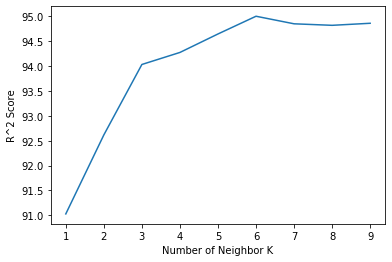

In [8]:
plt.plot(list_k, list_r_score)
plt.xlabel('Number of Neighbor K')
plt.ylabel('R^2 Score')
plt.show()

In [9]:
knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [10]:
y_pred = knn.predict(X_test)
y_pred

array([3.9       , 1.36666667, 5.71666667, 4.63333333, 4.6       ,
       1.6       , 4.16666667, 5.71666667, 4.63333333, 3.9       ,
       5.53333333, 1.4       , 1.38333333, 1.4       , 1.36666667,
       4.85      , 5.85      , 3.91666667, 4.16666667, 5.85      ,
       1.38333333, 5.36666667, 1.6       , 5.66666667, 5.53333333,
       5.71666667, 5.36666667, 5.71666667, 1.36666667, 1.38333333])

In [11]:
print("The Training R^2 score is: ", knn.score(X_train,y_train))
print("The Testing R^2 score is: ", knn.score(X_test,y_test))

The Training R^2 score is:  0.9581011061128362
The Testing R^2 score is:  0.9499968922866555


In [12]:
from sklearn import metrics  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))   

Mean Squared Error: 0.16387962962962974


In [13]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values, 
                   'Prediction': pd.DataFrame(y_pred)[0].values})  
df.head()

,Actual,Prediction
0,4.7,3.900000
1,1.7,1.366667
2,6.9,5.716667
3,4.5,4.633333
4,4.8,4.600000


In [14]:
x_now = [[0.25]]
y_now = knn.predict(x_now)
y_now

array([1.38333333])